<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Problem-description" data-toc-modified-id="Problem-description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem description</a></span></li><li><span><a href="#Simple-model-with-mock-data" data-toc-modified-id="Simple-model-with-mock-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Simple model with mock data</a></span><ul class="toc-item"><li><span><a href="#Regression-on-un-preprocessed-data" data-toc-modified-id="Regression-on-un-preprocessed-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Regression on un preprocessed data</a></span></li><li><span><a href="#Modelling-on-preprocessed-data" data-toc-modified-id="Modelling-on-preprocessed-data-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Modelling on preprocessed data</a></span><ul class="toc-item"><li><span><a href="#Covert-to-cyclic-features" data-toc-modified-id="Covert-to-cyclic-features-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Covert to cyclic features</a></span></li><li><span><a href="#Converting-to-Dummies/OneHotEncoding" data-toc-modified-id="Converting-to-Dummies/OneHotEncoding-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Converting to Dummies/OneHotEncoding</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Visualisation" data-toc-modified-id="Visualisation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualisation</a></span><ul class="toc-item"><li><span><a href="#Histogram-with-polar-projection" data-toc-modified-id="Histogram-with-polar-projection-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Histogram with polar projection</a></span></li><li><span><a href="#'Ground-up'-solution" data-toc-modified-id="'Ground-up'-solution-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>'Ground-up' solution</a></span></li></ul></li><li><span><a href="#Appendix---Plotting-fun" data-toc-modified-id="Appendix---Plotting-fun-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Appendix - Plotting fun</a></span></li></ul></div>

# Cyclical features

## Intro

Working on an anomaly detection project I was looking for new creative ways to transform date fields into sensible distances when I bumped into a blog: http://blog.davidkaleko.com/feature-engineering-cyclical-features.html. It triggered me to investigate:

> "Hours of the day, days of the week, months in a year, and wind direction are all examples of features that are cyclical. Many new machine learning engineers don’t think to convert these features into a representation that can preserve information such as hour 23 and hour 0 being close to each other and not far."
(https://medium.com/ai³-theory-practice-business/top-6-errors-novice-machine-learning-engineers-make-e82273d394db)

Hour of the day, day of the week etc. are not frequently used features. Typically they would appear in some capacity planning related issues: predicting webtraffic, orderpicking personel or trafficjams. In frequently used Machine learning datasets it appears in the Bikesharing dataset (https://archive.ics.uci.edu/ml/datasets/bike+sharing+dataset). But never the cyclical nature of the hour of the day is considered.

This quick write up addresses:

1. Problem description
2. Simple model
3. Conclusion
4. Attempt to visualize

## Problem description

In [57]:
#create data

import numpy as np
import pandas as pd


data = {'hr': [1,2,3,4,5,6,7,8,9,10,11,12], 'mnth': [1,2,3,4,5,6,7,8,9,10,11,12]}

df = pd.DataFrame(data)
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))
df['mnth_sin'] = np.sin((df.mnth-1)*(2.*np.pi/12))
df['mnth_cos'] = np.cos((df.mnth-1)*(2.*np.pi/12))

In [58]:
df = pd.DataFrame()
hr = []
for x in range(0,24):
    hr.append(x+1)
df['hr']=hr

# mnth = []
# for x in range(0,12):
#     mnth.append(x+1)
# df['mnth']=mnth

In [59]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [60]:
df

,hr,hr_sin,hr_cos
0,1,2.588190e-01,9.659258e-01
1,2,5.000000e-01,8.660254e-01
2,3,7.071068e-01,7.071068e-01
3,4,8.660254e-01,5.000000e-01
4,5,9.659258e-01,2.588190e-01
5,6,1.000000e+00,6.123234e-17
6,7,9.659258e-01,-2.588190e-01
7,8,8.660254e-01,-5.000000e-01
8,9,7.071068e-01,-7.071068e-01
9,10,5.000000e-01,-8.660254e-01


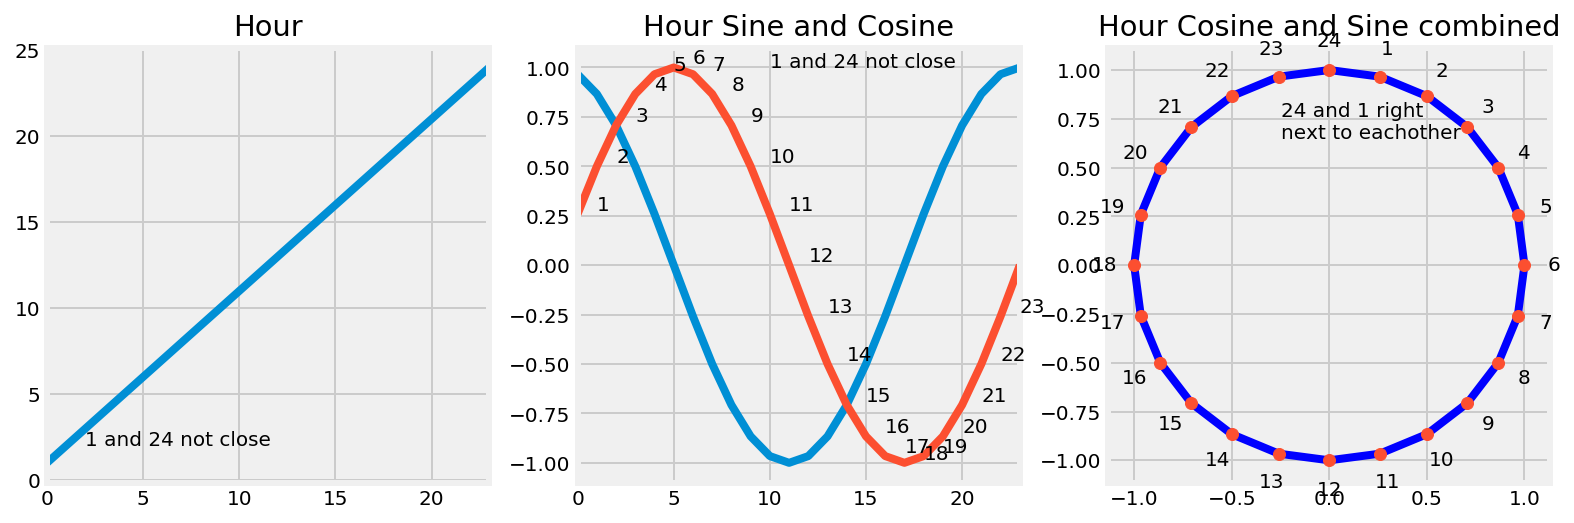

In [260]:

#Vizualize the problem


fig, (ax1, ax2, ax3) = plt.subplots(1,3 , figsize=(12,4))
plt.axis('equal')

df.hr.plot(ax=ax1)
df.hr_cos.plot(ax=ax2)
df.hr_sin.plot(ax=ax2)
ax3.fill(df['hr_sin'],df['hr_cos'], lw=4, ec = 'blue', fill=False, zorder=1)
ax3.scatter(df['hr_sin'],df['hr_cos'], zorder=2)

df.hr.plot(ax=ax4)

for i, txt in enumerate(hr):
    ax3.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
            horizontalalignment='center',
            verticalalignment='center')

for i, txt in enumerate(hr):
    ax2.annotate(txt, ((df['hr'][i]), df['hr_sin'][i]),
            horizontalalignment='left',
            verticalalignment='bottom')

ax1.set_title('Hour')
ax1.text(2,2,'1 and 24 not close')
ax2.set_title('Hour Sine and Cosine')
ax2.text(10,1,'1 and 24 not close')
ax3.set_title('Hour Cosine and Sine combined')
ax3.text(-.25,.65, '24 and 1 right \nnext to eachother');

In [145]:
!ls CookBooks/Sources/

AdaBoostPicture.png       README.md                 image.png
DataScienceDefCricl.png   ShapeFiles                meme-books.png
DeWitteJuffer.csv         aurelien.jpeg             newton-right.jpg
MarkChainGraph.png        boosted-trees-process.png turnover.xlsx
MarkChainTransMatr.png    ga-natural-selection.png


In [280]:
# create sample data
path = '/Users/maartenk/Documents/git/CookBooks/Sources/'
file = 'turnover.xlsx'


## Simple model with mock data

Creating some mock data. Fictitious data of goods movements by the hour in a fictitious warehouse of a fictitious webstore. Shipping out takes place in the evening and early night, restocking during the day.

In [305]:
df = pd.read_excel(path+file)

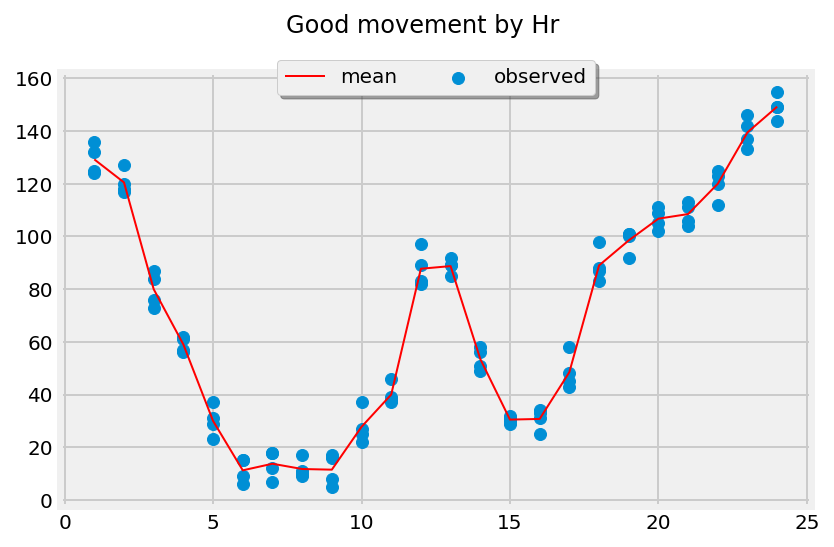

In [306]:
fig, ax = plt.subplots()
ax.scatter(df['hr'], df['turnover'], label='observed')
ax.plot(df.groupby(by = df['hr']).mean(), lw=1, c='r', label='mean')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
fig.suptitle('Good movement by Hr')
plt.show()

### Regression on un preprocessed data 

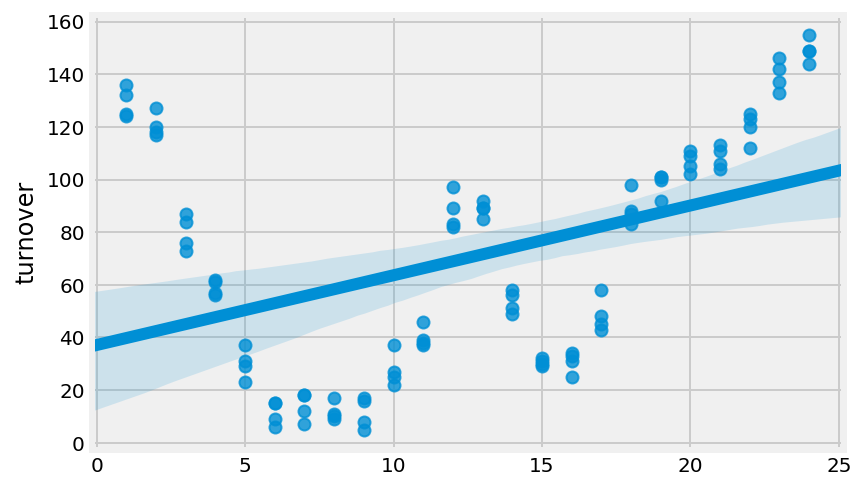

In [307]:
# regplot to get in indication of a simple regression fit
import seaborn as sns

sns.regplot(df[['hr']], df['turnover']);

In [308]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr']], df[['turnover']])
model.score(df[['hr']], df[['turnover']])

0.1733796432227398

In [309]:
#Scaling makes no difference

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
model = LinearRegression()

model.fit(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))
model.score(ss.fit_transform(df[['hr']]), ss.fit_transform(df[['turnover']]))

0.17337964322273972

### Modelling on preprocessed data
#### Covert to cyclic features 

In [310]:
df['hr_sin'] = np.sin(df.hr*(2.*np.pi/24))
df['hr_cos'] = np.cos(df.hr*(2.*np.pi/24))

In [311]:
df.columns

Index(['hr', 'turnover', 'hr_sin', 'hr_cos'], dtype='object')

In [312]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(df[['hr_sin', 'hr_cos']], df[['turnover']])
model.score(df[['hr_sin', 'hr_cos']], df[['turnover']])

0.635885836759986

#### Converting to Dummies/OneHotEncoding

In [313]:
X = pd.get_dummies(df['hr'])

In [314]:
X.sample(5)

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
78,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
52,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [315]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, df[['turnover']])
model.score(X, df[['turnover']])

0.9898820731294891

### Conclusion

If cyclical data is treated as a feature in Machine Learning *not* preprocessing is in clearly wrong. In this simple example OneHot/Dummies give the best result. My guess would be that if more continuous features are added to the feature set a conversion to cyclic features will render the best results.

Note on Timezones: depending on the problem timezone, need to be considered and it my be necessary to convert all time to a single timezone. This is relevant where not all process in the value chain at hand take place in the same timezone. Simple example: International webstores may need to convert the timestamp of order entry to a reference time if they want to know order intake during the day for instance for customer service purposes. It would *not* if it wanted to know when customers like to visit the website.

## Visualisation

Some simple attempts to visualize cyclic data

In [292]:
#Determine the 'length' of the histogram bar
radiusratio = df['turnover'].groupby(by = df['hr']).mean()\
/df['turnover'].groupby(by = df['hr']).sum().sum()

In [293]:

hrcycle = [] 
for i in range(1,25):
    hrcycle.append(i)
hrcycle.append(1)
    

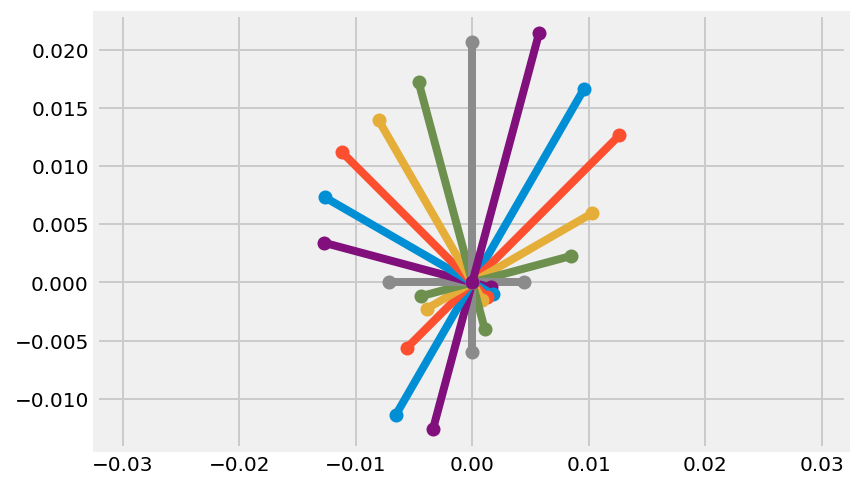

In [294]:
# check plot
plt.axis('equal')
for i in range(1,25):
    plt.plot((df['hr_sin'][i]*radiusratio[i],0), (df['hr_cos'][i]*radiusratio[i],0), marker='o')
#     plt.plot(df['hr_sin'][i]*radiusratio[i],
#              df['hr_cos'][i]*radiusratio[i], marker='x')

### Histogram with polar projection

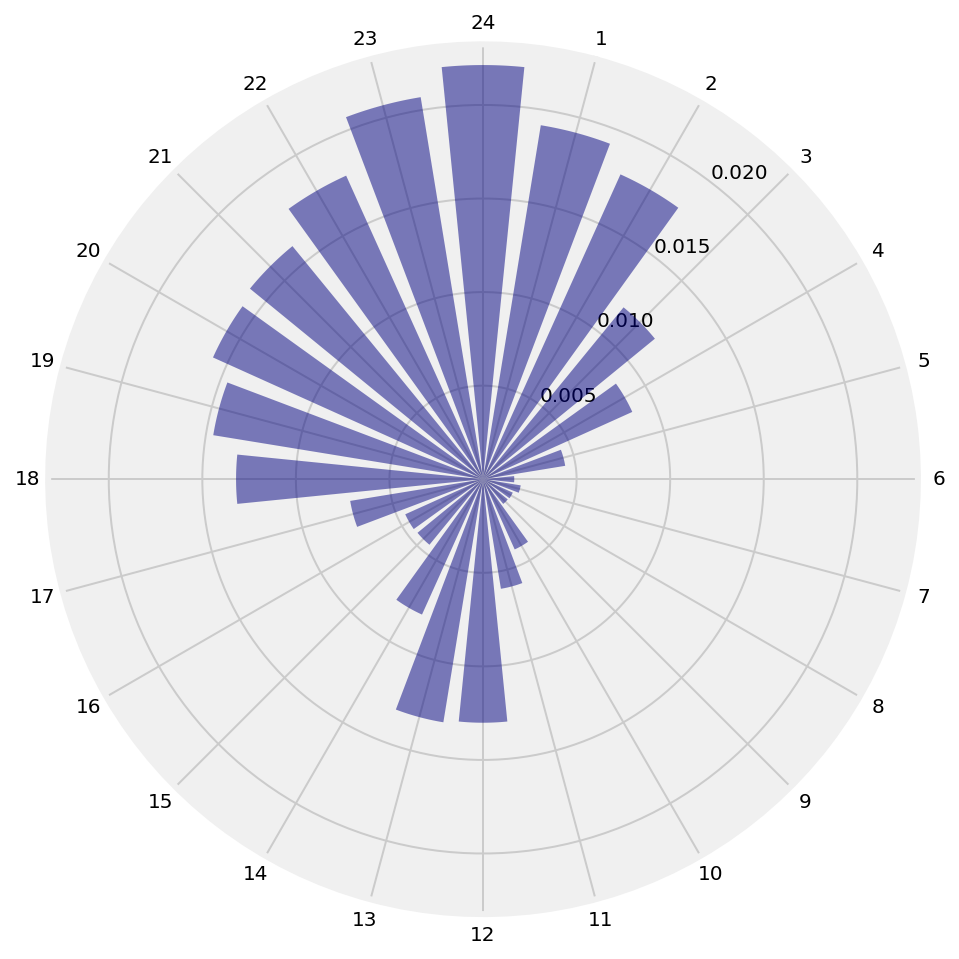

In [297]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111,polar=True)

plt.gca().set_prop_cycle(None)
plt.get_cmap("jet")
sample = radiusratio
N = len(sample)

theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

# bars = ax.bar(theta, sample, width=0.4)
bars = ax.bar(theta, sample, width=0.2, bottom=0.0)
for r,bar in zip(sample, bars):
    bar.set_facecolor(cm.jet(r/len(sample)))
    bar.set_alpha(0.5)

ax.set_theta_zero_location('N', offset=345) #set 24 at the top
ax.set_theta_direction(-1) # reverse order
ax.set_xticks(theta)
ax.set_xticklabels(range(1, len(theta)+1))
ax.yaxis.grid(True)

plt.show()

### 'Ground-up' solution

A little rough still but may be tweaked

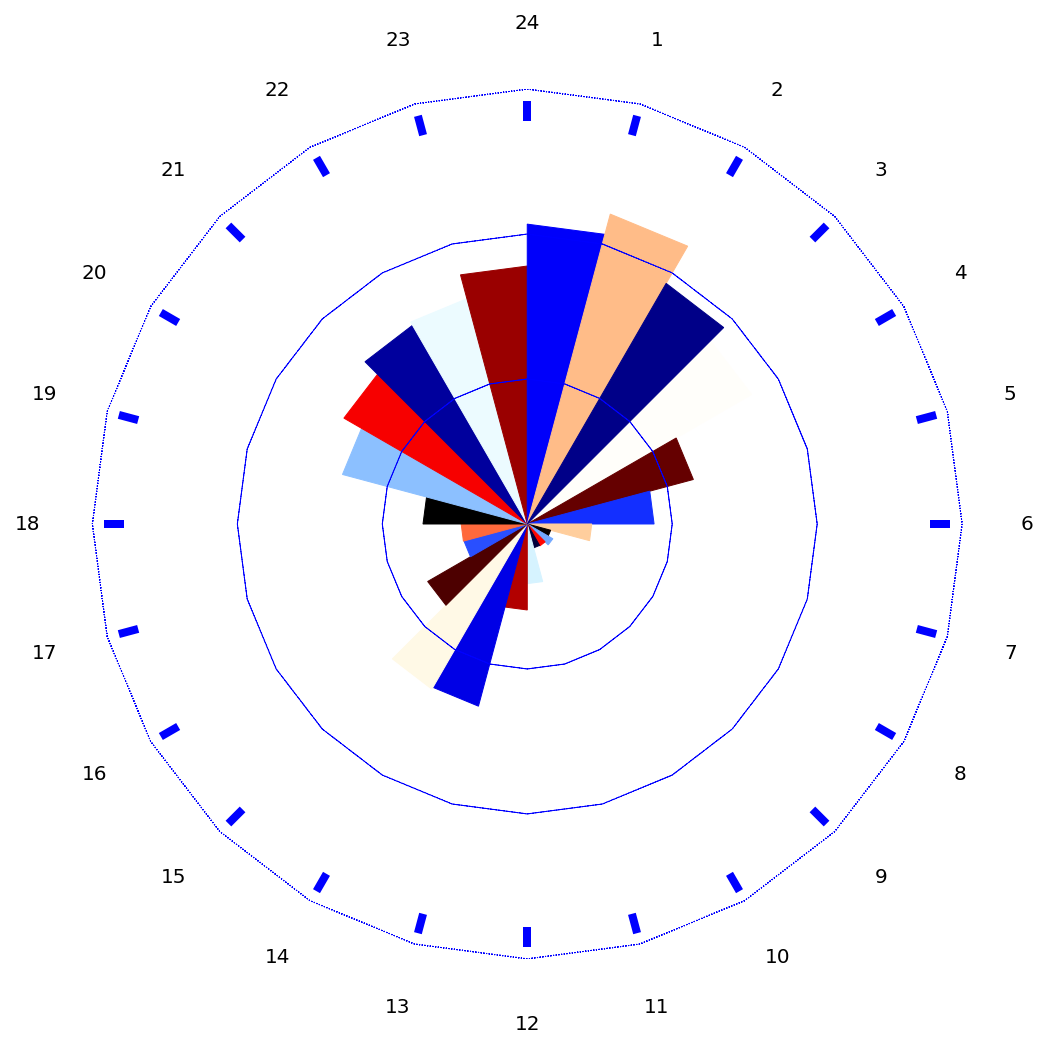

In [299]:
cmap=plt.get_cmap("flag")
plt.figure(figsize=(8,8))

plt.axis('equal')

for i in hrcycle[1:25]: # 24 hours
    #create triangle starting at 0.0 with length of radius ratio
    t1 = plt.Polygon(((df['hr_sin'][hrcycle[i-1]]*radiusratio[i],\
                       df['hr_cos'][hrcycle[i-1]]*radiusratio[i]),\
                      (df['hr_sin'][hrcycle[i]]*radiusratio[i],\
                       df['hr_cos'][hrcycle[i]]*radiusratio[i]),\
                      (0,0)), color=cmap(float(i)/len(hrcycle)))
    plt.gca().add_patch(t1)

# create grid lines
plt.xlim(-.03,.03)
plt.ylim(-.03, .03)
plt.fill(df['hr_sin']*.01,df['hr_cos']*.01, lw=.5, ec='b',linestyle=':', fill=False, zorder=1)
plt.fill(df['hr_sin']*.02,df['hr_cos']*.02, lw=.5, ec='b',linestyle=':', fill=False, zorder=1)
plt.fill(df['hr_sin']*.03,df['hr_cos']*.03, lw=.51, ec='b',linestyle=':', fill=False, zorder=1)


#create markers
for i in range(24):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i]*.03,df['hr_cos'][i]*.03)
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.95), (a2*.95), marker=t, s=100, c='b')
    
# create labels    
for i, txt in enumerate(hr):
    plt.annotate(txt, (df['hr_sin'][i]*.03, df['hr_cos'][i]*.03), (df['hr_sin'][i]*1.15*.03, df['hr_cos'][i]*1.15*.03),   # fraction, fraction
            horizontalalignment='center',
            verticalalignment='center')
plt.axis(False)
plt.show()
# https://stackoverflow.com/questions/49098333/picking-plot-colors-from-matplotlib-colorbar

## Appendix - Plotting fun

What else can you do using the same basic set up?

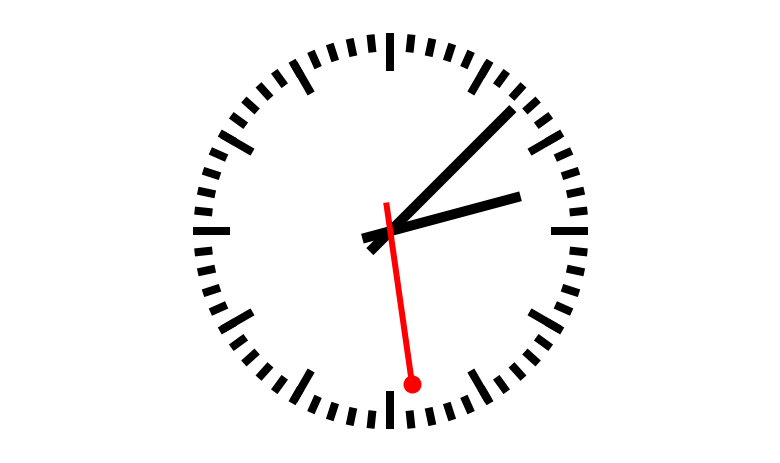

In [303]:
# https://stackoverflow.com/questions/23345565/is-it-possible-to-control-matplotlib-marker-orientation
import matplotlib.pyplot as plt
import matplotlib as mlp

fig, ax = plt.subplots()

# ax.add_patch(plt.Circle((0, 0), 1.05, fill=None, ec='k', lw=5))

for i in range(1,24,2):
    angle = (np.array(np.linspace(15,360,24))[i])
    a1, a2  = (df['hr_sin'][i],df['hr_cos'][i])
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.92), (a2*.92), marker=t, s=300, c='k')
    
for i in range(1,61):
    angle = (np.array(np.linspace(0,360,61))[i])
    a1, a2  = (np.sin(i*2.*np.pi/60)),np.cos(i*(2.*np.pi/60))
    
    t = mpl.markers.MarkerStyle(marker='|')
    t._transform = t.get_transform().rotate_deg(-angle)
    plt.scatter((a1*.98), (a2*.98), marker=t, s=80, c='k')
    
# for i, txt in enumerate(hr):
#     plt.annotate(txt, (df['hr_sin'][i], df['hr_cos'][i]), (df['hr_sin'][i]*1.15, df['hr_cos'][i]*1.15),   # fraction, fraction
#             horizontalalignment='center',
#             verticalalignment='center')

ax.plot((df['hr_sin'][2]*.9, df['hr_sin'][2]*-.15),(df['hr_cos'][2]*.9, df['hr_cos'][2]*-.15), lw =5, c='black')
# # ax.plot((np.sin(5)*.7,(np.sin(5)*-.2),(np.cos(5)*.7),(np.cos(5)*-.2), lw =5, c='black')
ax.plot((np.sin(5*2.*np.pi/24)*.7,np.sin(5*2.*np.pi/24)*-.15),(np.cos(5*2.*np.pi/24)*.7,np.cos(5*2.*np.pi/24)*-.15), lw =5, c='black')
ax.plot((np.sin(3)*.8, np.sin(3)*-.15),(np.cos(3)*.8,np.cos(3)*-.15), lw =3, marker='o',c='red', markevery=-1, markersize=8)

#Use adjustable='box-forced' to make the plot area square-shaped as well.
ax.set_aspect('equal', adjustable='datalim')
ax.plot()   #Causes an autoscale update.
plt.axis('off')
plt.show()